In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Load Data
churn = pd.read_csv('/Users/aksharareddy/Documents/datasets/churn.csv')

# Churn Distribution
print(churn['Churn'].value_counts())
print(churn['Churn'].value_counts(normalize=True))

# Dataset Description
print(churn.describe())

Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [2]:
# Check duplicates
print(churn.duplicated().any())

False


In [3]:
# Check missing Values
print(churn.isna().any().any())
print(churn.isna().sum())
print(churn[churn.isna().any(axis=1)].shape[0])
print(churn['TotalCharges'].isna().sum() / churn.shape[0])


False
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
0
0.0


In [4]:
# Eliminate the rows with missing values
churn.dropna(inplace=True)
print(churn.shape)

(7043, 21)


In [5]:
# Check duplicates after removing missing values
print(churn.duplicated().any())

False


In [6]:
# Remove 'customerID' column
churn.drop(columns=['customerID'], inplace=True)

# Convert columns to factors
churn['SeniorCitizen'] = churn['SeniorCitizen'].astype('category')
churn = churn.apply(lambda x: x.astype('category') if x.dtype == 'object' else x)

# Recode "SeniorCitizen" column
churn['SeniorCitizen'].replace({'0': 'No', '1': 'Yes'}, inplace=True)

# Recode "MultipleLines" column
churn['MultipleLines'].replace({'No phone service': 'No'}, inplace=True)

# Recode a range of columns (9 to 14)
for col in churn.columns[8:13]:
    churn[col].replace({'No internet service': 'No'}, inplace=True)

# Create 'Tenure' bins
churn['Tenure'] = pd.cut(churn['tenure'], bins=[-np.inf, 12, 24, 36, 48, np.inf], labels=['0-1', '1-2', '2-3', '3-4', '4+'])

# Summary Statistics
print(churn.describe())

            tenure  MonthlyCharges
count  7043.000000     7043.000000
mean     32.371149       64.761692
std      24.559481       30.090047
min       0.000000       18.250000
25%       9.000000       35.500000
50%      29.000000       70.350000
75%      55.000000       89.850000
max      72.000000      118.750000


/Users/aksharareddy/Desktop/conda/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


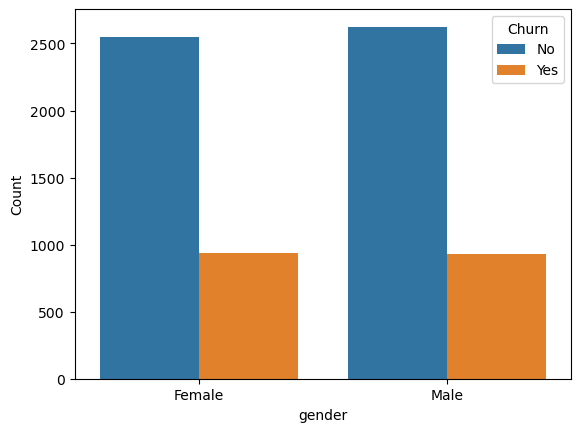

/Users/aksharareddy/Desktop/conda/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


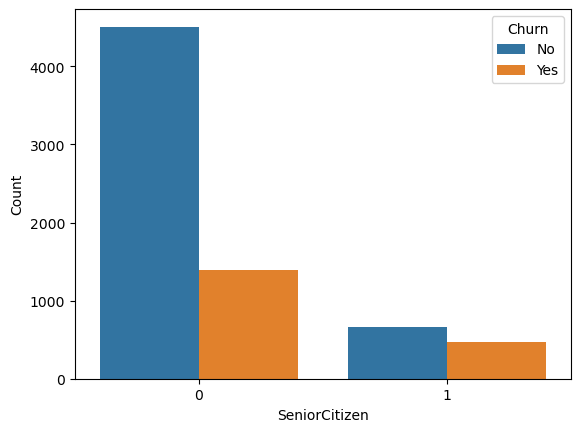

/Users/aksharareddy/Desktop/conda/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


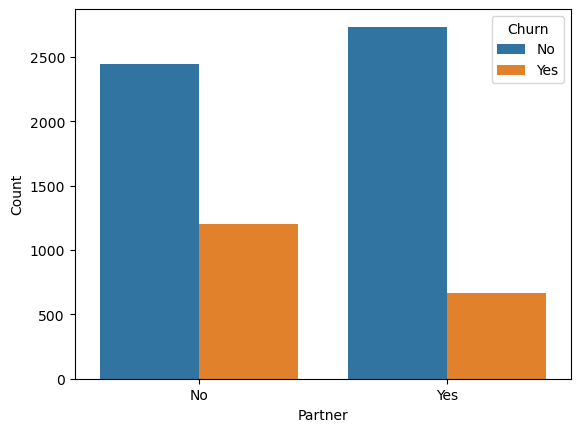

/Users/aksharareddy/Desktop/conda/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


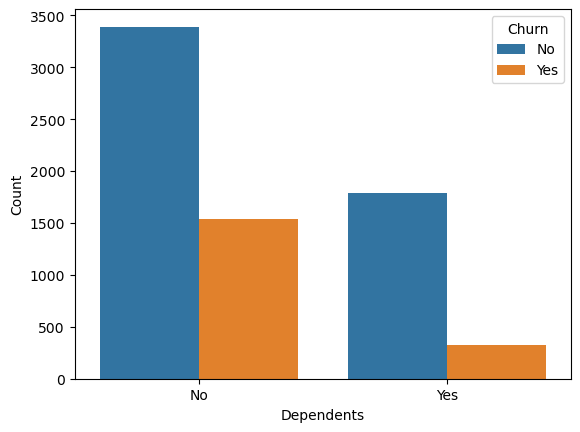

/Users/aksharareddy/Desktop/conda/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


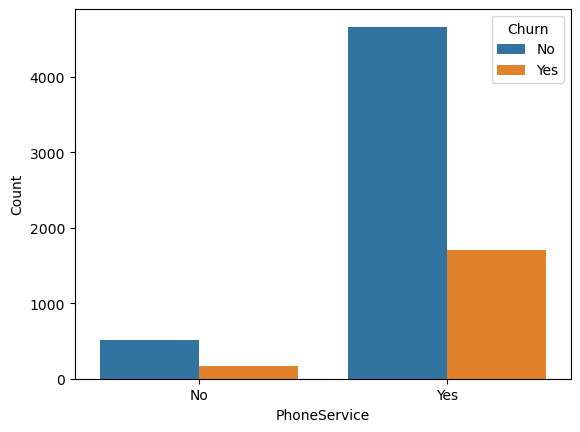

/Users/aksharareddy/Desktop/conda/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


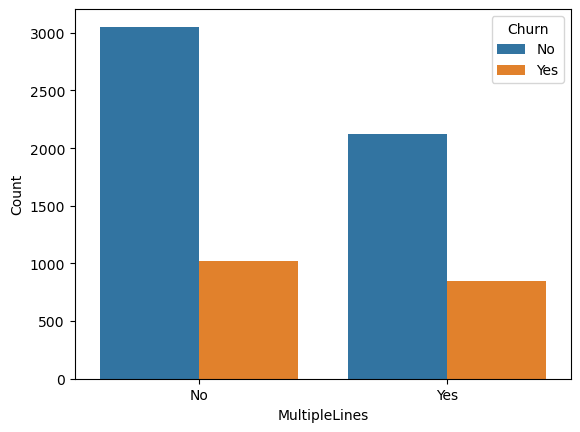

/Users/aksharareddy/Desktop/conda/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


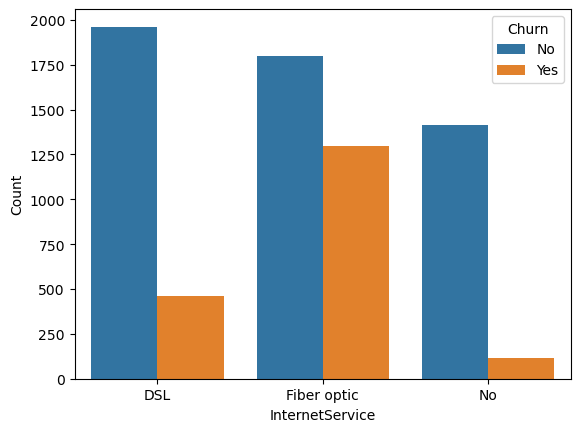

/Users/aksharareddy/Desktop/conda/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


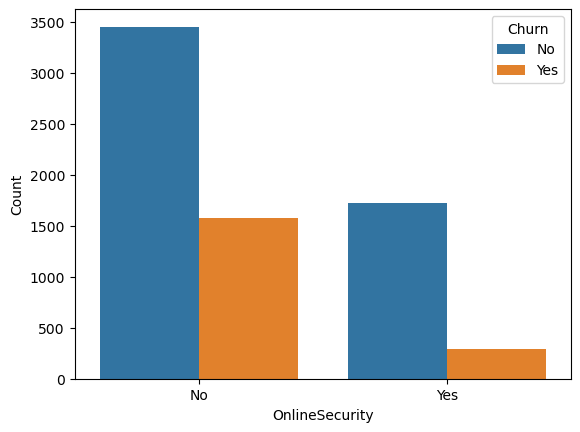

/Users/aksharareddy/Desktop/conda/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


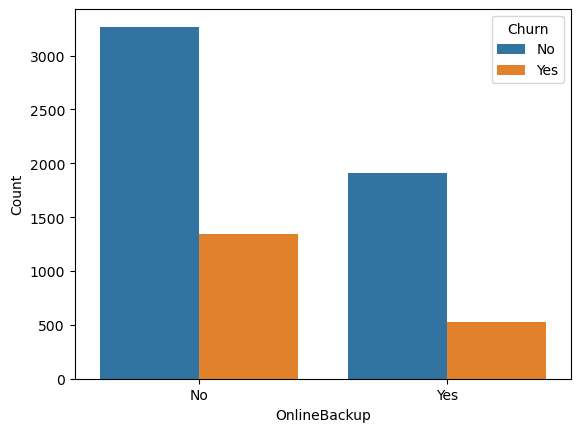

/Users/aksharareddy/Desktop/conda/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


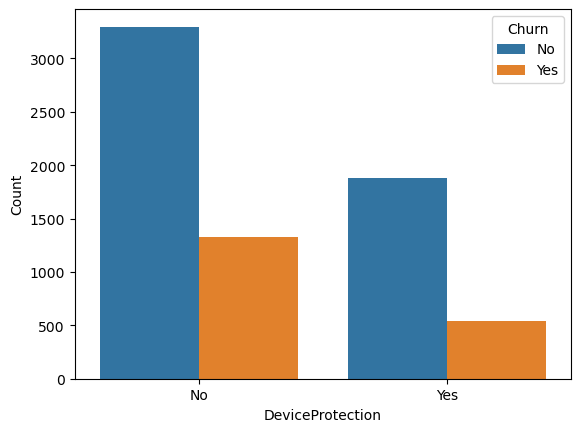

/Users/aksharareddy/Desktop/conda/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


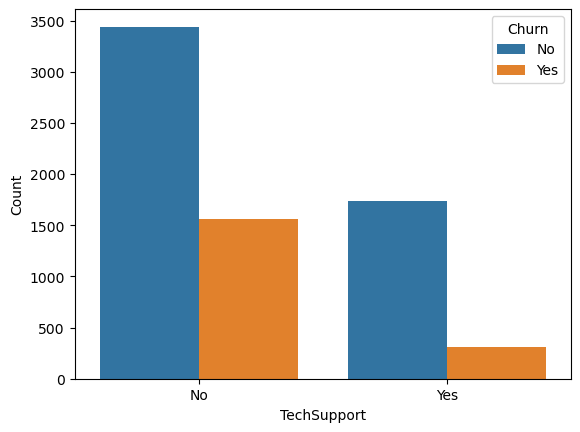

/Users/aksharareddy/Desktop/conda/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


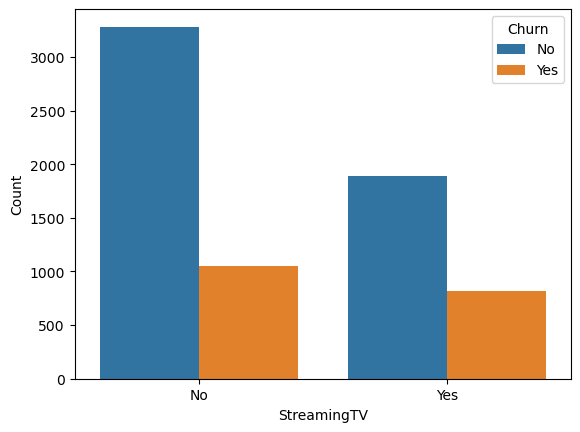

/Users/aksharareddy/Desktop/conda/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


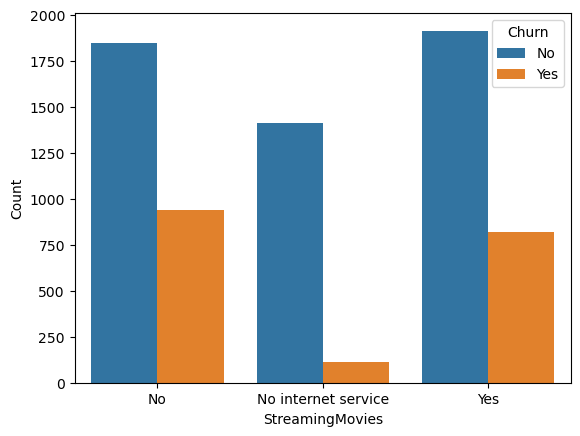

/Users/aksharareddy/Desktop/conda/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


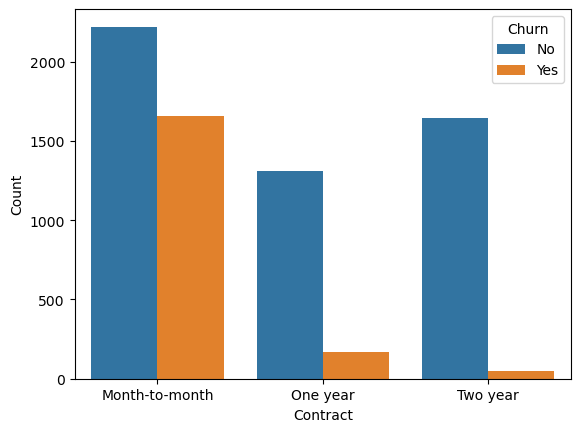

/Users/aksharareddy/Desktop/conda/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


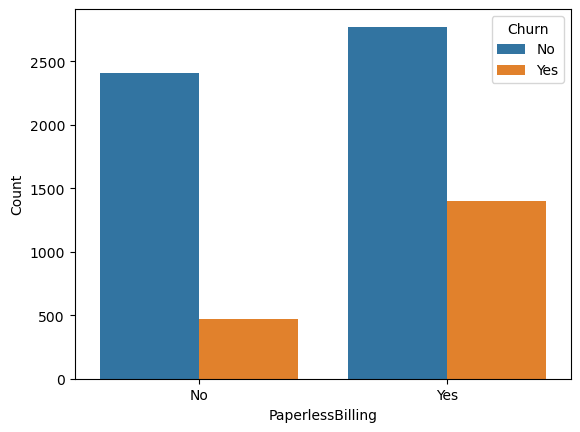

/Users/aksharareddy/Desktop/conda/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


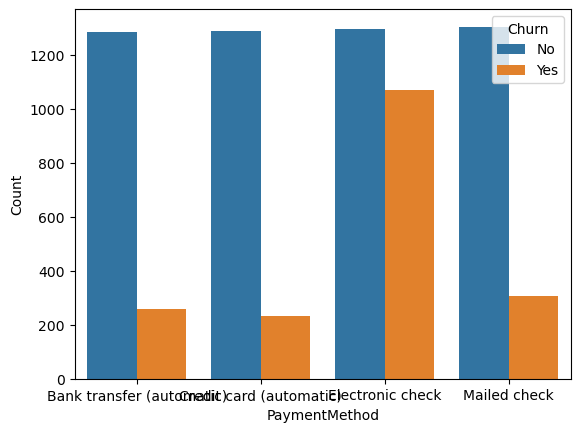

In [9]:
# Visualization
def create_plot(data, variable):
    plt.figure()
    sns.countplot(data=data, x=variable, hue='Churn')
    plt.ylabel('Count')
    plt.show()

demographic_variables = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
for var in demographic_variables:
    create_plot(churn, var)

offered_service_variables = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                             'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                             'Contract', 'PaperlessBilling', 'PaymentMethod']
for var in offered_service_variables:
    create_plot(churn, var)


/Users/aksharareddy/Desktop/conda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aksharareddy/Desktop/conda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


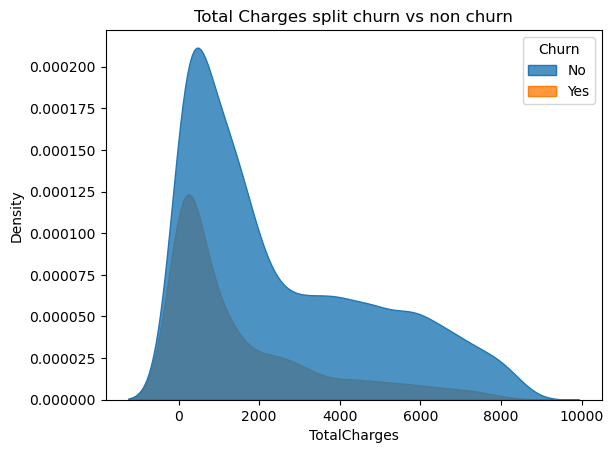

In [10]:
# Convert 'TotalCharges' to numeric
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce')

# Density plots for 'TotalCharges', 'MonthlyCharges', and 'tenure'
plt.figure()
sns.kdeplot(data=churn, x='TotalCharges', hue='Churn', fill=True, alpha=0.8)
plt.title('Total Charges split churn vs non churn')
plt.show()


/Users/aksharareddy/Desktop/conda/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


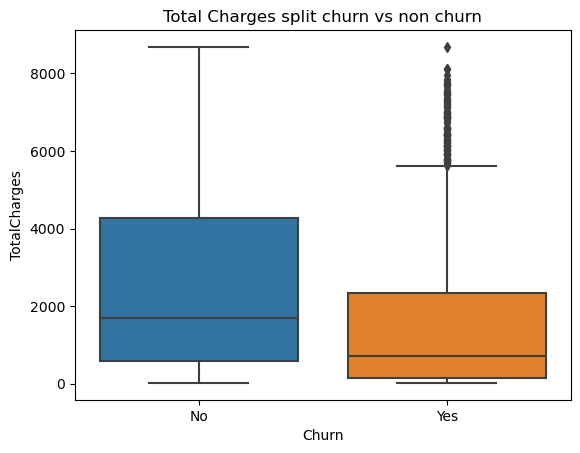

In [11]:
# Box plot for 'TotalCharges' by 'Churn'
plt.figure()
sns.boxplot(data=churn, x='Churn', y='TotalCharges')
plt.title('Total Charges split churn vs non churn')
plt.show()

/Users/aksharareddy/Desktop/conda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aksharareddy/Desktop/conda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


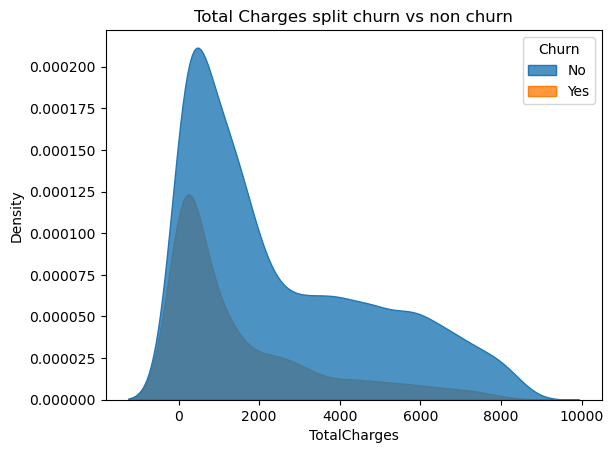

/Users/aksharareddy/Desktop/conda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aksharareddy/Desktop/conda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


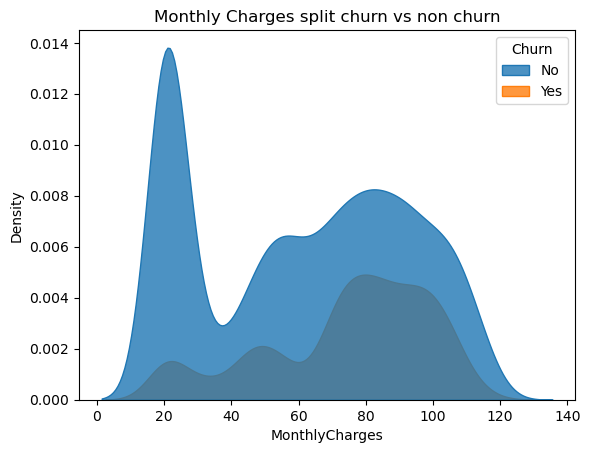

/Users/aksharareddy/Desktop/conda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aksharareddy/Desktop/conda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


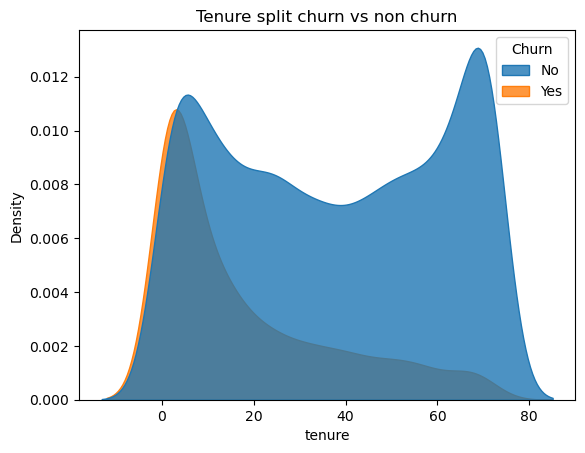

In [12]:
# Density plots for 'TotalCharges', 'MonthlyCharges', and 'tenure'
plt.figure()
sns.kdeplot(data=churn, x='TotalCharges', hue='Churn', fill=True, alpha=0.8)
plt.title('Total Charges split churn vs non churn')
plt.show()

plt.figure()
sns.kdeplot(data=churn, x='MonthlyCharges', hue='Churn', fill=True, alpha=0.8)
plt.title('Monthly Charges split churn vs non churn')
plt.show()

plt.figure()
sns.kdeplot(data=churn, x='tenure', hue='Churn', fill=True, alpha=0.8)
plt.title('Tenure split churn vs non churn')
plt.show()

/Users/aksharareddy/Desktop/conda/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


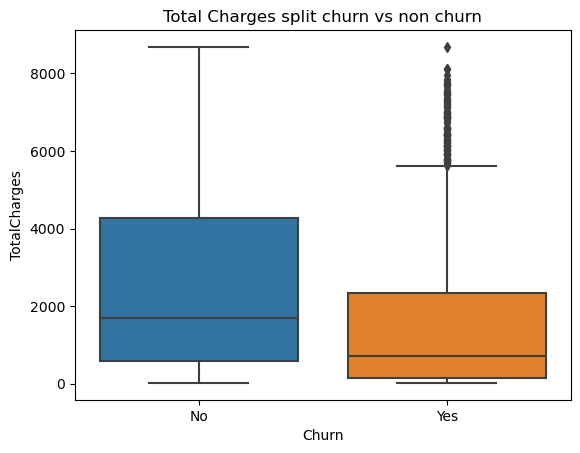

In [13]:
# Box plot for 'TotalCharges' by 'Churn'
plt.figure()
sns.boxplot(data=churn, x='Churn', y='TotalCharges')
plt.title('Total Charges split churn vs non churn')
plt.show()

/Users/aksharareddy/Desktop/conda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aksharareddy/Desktop/conda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


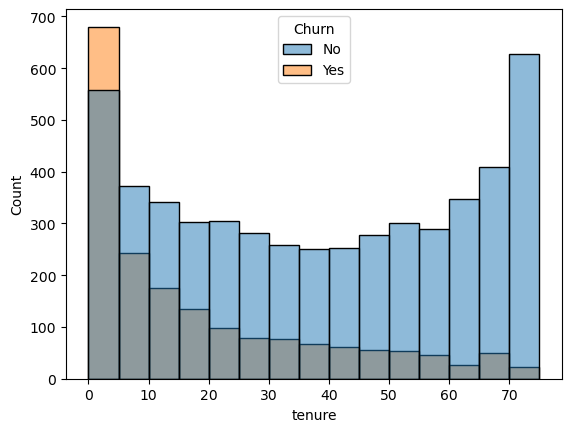

/Users/aksharareddy/Desktop/conda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aksharareddy/Desktop/conda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


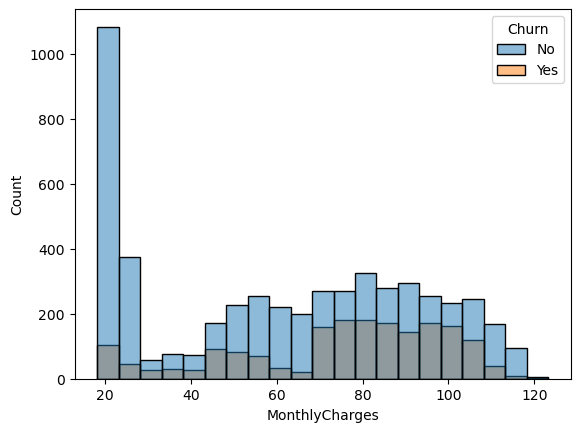

/Users/aksharareddy/Desktop/conda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aksharareddy/Desktop/conda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


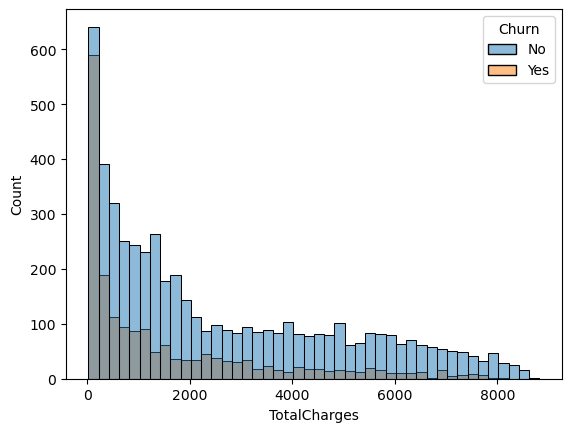

In [14]:
# Histograms for quantitative variables
quantitative_variables = [('tenure', 5), ('MonthlyCharges', 5), ('TotalCharges', 200)]
for variable, binwidth in quantitative_variables:
    plt.figure()
    sns.histplot(data=churn, x=variable, bins=np.arange(min(churn[variable]), max(churn[variable]) + binwidth, binwidth), hue='Churn')
    plt.show()


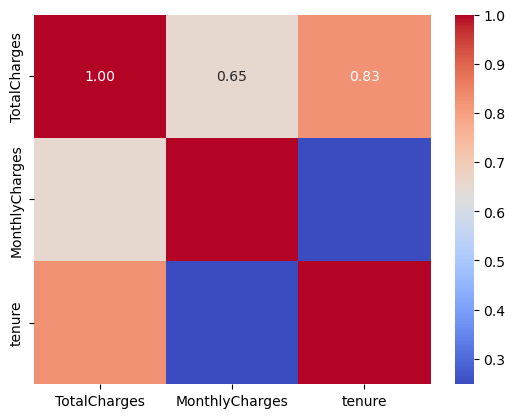

In [15]:
# Correlation
correlation_matrix = churn[['TotalCharges', 'MonthlyCharges', 'tenure']].corr()
plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [16]:
# Remove 'TotalCharges' and 'tenure' columns
churn.drop(columns=['TotalCharges', 'tenure'], inplace=True)

# Train-test split
X = churn.drop(columns=['Churn'])
y = churn['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Perform one-hot encoding for categorical variables
churn = pd.get_dummies(churn, drop_first=True)

# Split the dataset into features (X) and target variable (y)
X = churn.drop('Churn_Yes', axis=1)  # Features
y = churn['Churn_Yes']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [17]:
# Decision Tree
dt_fit = DecisionTreeClassifier()
dt_fit.fit(X_train, y_train)
y_pred_train_dt = dt_fit.predict(X_train)
y_pred_test_dt = dt_fit.predict(X_test)
print(confusion_matrix(y_test, y_pred_test_dt))

[[1254  285]
 [ 310  264]]


In [18]:
# Random Forest
rf_fit = RandomForestClassifier(n_estimators=75, max_features='sqrt', random_state=42)
rf_fit.fit(X_train, y_train)
y_pred_test_rf = rf_fit.predict(X_test)
print(confusion_matrix(y_test, y_pred_test_rf))
print(classification_report(y_test, y_pred_test_rf))

[[1375  164]
 [ 309  265]]
              precision    recall  f1-score   support

       False       0.82      0.89      0.85      1539
        True       0.62      0.46      0.53       574

    accuracy                           0.78      2113
   macro avg       0.72      0.68      0.69      2113
weighted avg       0.76      0.78      0.77      2113



In [19]:
# Logistic Regression
lr_fit = LogisticRegression(max_iter=1000)
lr_fit.fit(X_train, y_train)
y_pred_test_lr = lr_fit.predict(X_test)
print(confusion_matrix(y_test, y_pred_test_lr))
print(classification_report(y_test, y_pred_test_lr))


[[1398  141]
 [ 288  286]]
              precision    recall  f1-score   support

       False       0.83      0.91      0.87      1539
        True       0.67      0.50      0.57       574

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



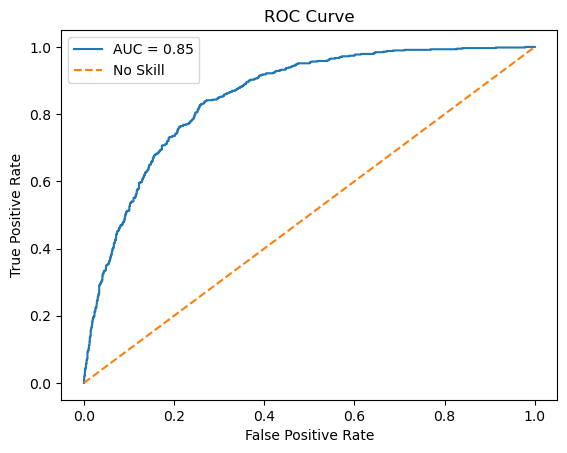

In [20]:
# ROC Curve for Logistic Regression
probabilities_lr = lr_fit.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities_lr)
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, probabilities_lr):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
